<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Separación-train-test" data-toc-modified-id="Separación-train-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Separación train-test</a></span></li><li><span><a href="#Ajustamos-el-modelo" data-toc-modified-id="Ajustamos-el-modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ajustamos el modelo</a></span><ul class="toc-item"><li><span><a href="#Antes-de-empezar-entendamos-mejor-que-es-una-regresión-lineal" data-toc-modified-id="Antes-de-empezar-entendamos-mejor-que-es-una-regresión-lineal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Antes de empezar entendamos mejor que es una regresión lineal</a></span></li><li><span><a href="#Usando-la-librería-sklearn" data-toc-modified-id="Usando-la-librería-sklearn-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Usando la librería sklearn</a></span></li></ul></li><li><span><a href="#Predicción" data-toc-modified-id="Predicción-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predicción</a></span></li><li><span><a href="#Validación-del-modelo" data-toc-modified-id="Validación-del-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Validación del modelo</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cross validation</a></span></li></ul></li><li><span><a href="#Otros-modelos" data-toc-modified-id="Otros-modelos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otros modelos</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Ajustamos-el-modelo" data-toc-modified-id="Ajustamos-el-modelo-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Ajustamos el modelo</a></span></li><li><span><a href="#Ajustamos-el-modelo-usando-el-GridSearch" data-toc-modified-id="Ajustamos-el-modelo-usando-el-GridSearch-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Ajustamos el modelo usando el GridSearch</a></span></li><li><span><a href="#Predicción" data-toc-modified-id="Predicción-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Predicción</a></span></li><li><span><a href="#Importancia-de-cada-variable" data-toc-modified-id="Importancia-de-cada-variable-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Importancia de cada variable</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Ajustamos-el-modelo-usando-GridSearch" data-toc-modified-id="Ajustamos-el-modelo-usando-GridSearch-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Ajustamos el modelo usando GridSearch</a></span></li><li><span><a href="#Predicción" data-toc-modified-id="Predicción-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Predicción</a></span></li><li><span><a href="#Importancia-de-las-variables" data-toc-modified-id="Importancia-de-las-variables-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Importancia de las variables</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')




# Separación train-test

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta, es decir, comparar los predichos frente a los reales. 

Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un **conjunto de entrenamiento y un conjunto de test**. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, **80%-20% suele dar buenos resultados**. 

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Esto lo haremos explorando cada una de las divisiones que hicimos. 

In [2]:
df_limpio = pd.read_csv("data/csv_final.csv", index_col = 0)
df_limpio.head()

,median_home_val,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,x0_AL,x0_AR,x0_AZ,...,x0_NV,x0_OK,x0_OR,x0_SC,x0_TN,x0_TX,x0_WA,x0_WI,x1_F,x1_M
0,8.423112,0.506329,0.419162,0.694268,0.715152,1.558551,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,7.358044,0.335443,0.329341,0.337580,0.430303,1.049203,-0.815624,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7.769124,-0.069620,-0.119760,0.025478,0.206061,0.940957,-1.108413,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.423112,0.563291,0.281437,0.267516,0.066667,-0.008266,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.209241,-0.379747,-0.479042,-0.261146,-0.327273,0.774454,-0.752884,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
nuevas_columnas = {
    "ic2" : "num_habitaciones", 
    "ic3": "num_vecinos", 
    "ic4": "total_habitaciones", 
    "ic5": "total_baños", 
    "avggift": "dist_playa"}

df_limpio.rename(columns = nuevas_columnas, inplace = True)

In [4]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_limpio.drop('median_home_val', axis =1)
y = df_limpio['median_home_val']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

📌 Buena práctica, es recomendable que miremos que los datos del train y del test guarden consistencia estadística. 

In [5]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())


Datos de entrenamiento
-----------------------
count    2666.000000
mean        7.814242
std         0.673506
min         5.475338
25%         7.376281
50%         7.832419
75%         8.247115
max         9.299106
Name: median_home_val, dtype: float64


In [6]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())


Datos de testeo
-----------------------
count    667.000000
mean       7.824559
std        0.671124
min        5.580045
25%        7.373153
50%        7.852321
75%        8.238518
max        9.297061
Name: median_home_val, dtype: float64


# Ajustamos el modelo


Podremos hacerlo de dos formas: 

- Usando la librería **statsmodels**


- Usando la librería **sklearn**

¿En que se diferencian estos dos métodos?

En esencia ninguna. Sin embargo, el modelo de `statsmodels` sigue la aproximación más tradicional en la que vamos a querer saber que variables "explican" o afectan más a la variable respuesta a través de los *p-valores*. Por otro lado, sigue la aproximación de aprendizaje automático donde lo importante el principal objetivo es elegir el mejor modelo. 

## Antes de empezar entendamos mejor que es una regresión lineal

De un modo general se dice que existe regresión de los valores de una variable con respecto a los de la otra cuando hay alguna línea, denominada línea de regresión, que se ajusta más o menos claramente a los valores observados. La regresión se usa para la identificación de relaciones potencialmente causales o bien, cuando no existen dudas sobre su relación causal, para predecir una variable a partir de la otra. 

![regresion](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/regresion.png?raw=true)

## Usando la librería sklearn

Se ajusta un primer modelo de regresión lineal con regularización LinearRegression para predecir el precio de la vivienda en función de todos los predictores disponibles. 

Necesitaremos importar:

```python
from sklearn.linear_model import LinearRegression

```

In [7]:
# iniciamos el método de Linear Regression
lr = LinearRegression()

In [8]:
# es el momento de ajustar el modelo. Para eso usaremos el método .fit() donde le tendremos que pasar las variables predictoras y la respuesta

lr.fit(X_train, y_train)

LinearRegression()

In [9]:
lr.intercept_

-715441169505.1687

In [10]:
lr.coef_

array([3.68586978e-02, 1.57995363e-01, 8.96935021e-02, 1.29537308e-01,
       1.34827581e-01, 6.70811462e-03, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 2.00940935e+11, 2.00940935e+11,
       2.00940935e+11, 2.00940935e+11, 5.14500234e+11, 5.14500234e+11])

# Predicción

Una vez que el modelo ha sido entrenado, con el método `.predict()` se pueden predecir nuevas observaciones. 

Veamos como hacerlo:



In [11]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [12]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results.head()

,Real,Predicted,Set
817,8.148881,7.869141,Train
1373,8.196514,8.247559,Train
679,7.688930,7.951904,Train
56,8.110234,7.554077,Train
1993,8.689652,7.720459,Train


In [13]:
results['residual'] = results['Real'] - results['Predicted']
results.head()

,Real,Predicted,Set,residual
817,8.148881,7.869141,Train,0.279740
1373,8.196514,8.247559,Train,-0.051045
679,7.688930,7.951904,Train,-0.262974
56,8.110234,7.554077,Train,0.556157
1993,8.689652,7.720459,Train,0.969193


**Pero... ¿qué son los residuos?** 

> Los residuos (o errores) son la diferencia entre los valores observados y los valores que predice el modelo:


Los residuos pueden ser nulos, positivos o negativos. 

- Si son nulos entonces no existe ningún error en la estimación, ya que, los valores observados coinciden con los valores estimados. 


- Si es positivo entonces el valor observado de Y es mayor que el valor estimado lo que implica que se infraestima la variable Y, en nuestro caso el precio de las casas.


- Si el residuo es negativo entonces el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso el precio de las casas

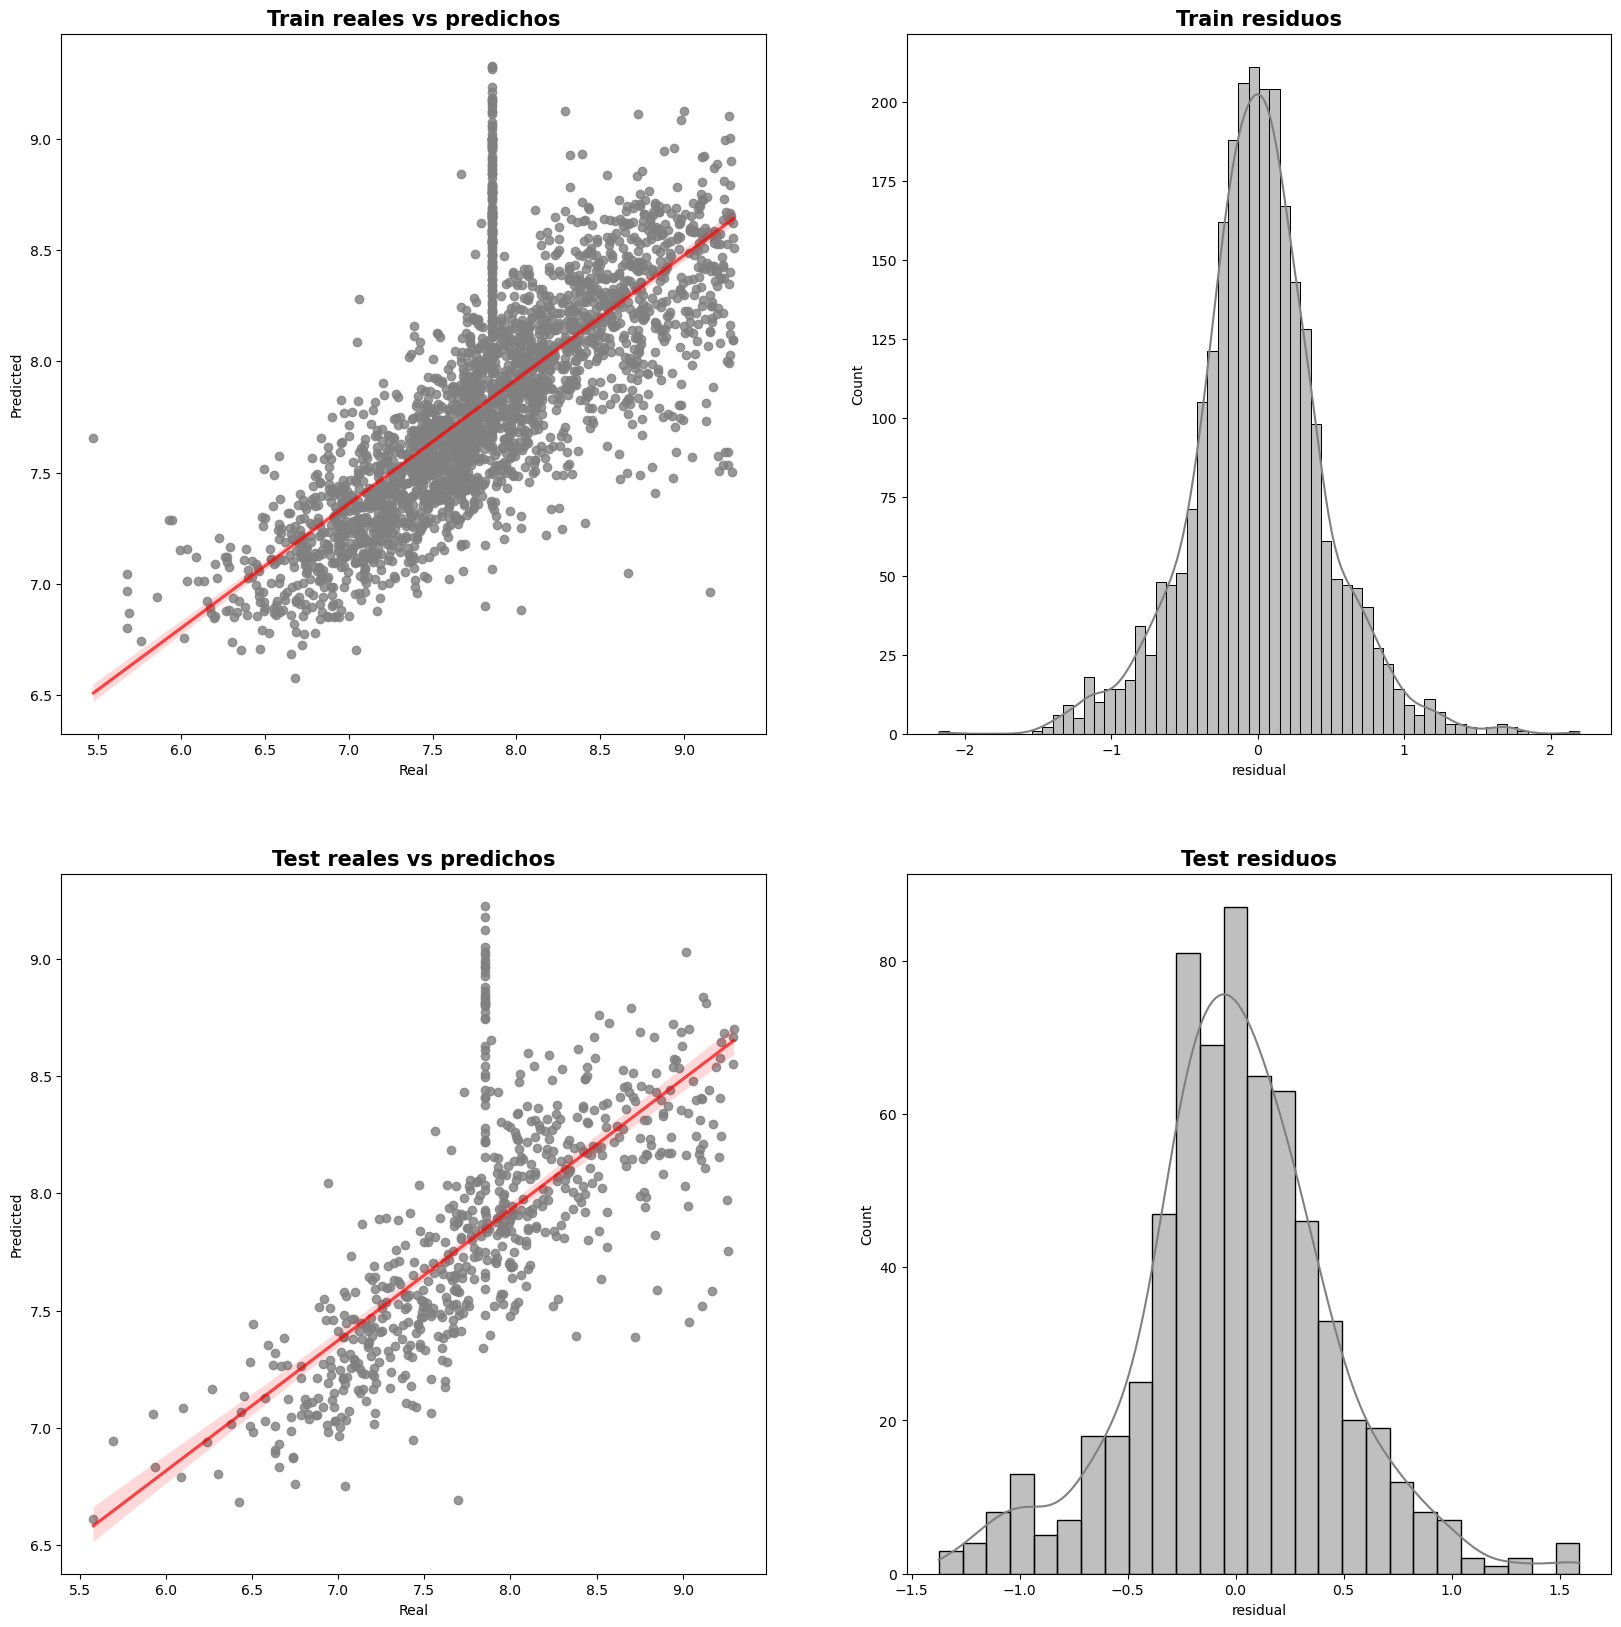

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = results[results['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = results[results['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(results[results['Set'] == "Train"],
             x="residual",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(results[results['Set'] == "Test"],
             x="residual",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# Validación del modelo

La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha “visto” antes, es decir, los datos que tenemos en el test. El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha “visto”. 

Si bien el análisis de los residuos son útiles para entender cómo está aprendiendo el modelo, no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones. 

Las métricas que usaremos para evaluar lo bueno que es nuestro modelo son: 

- Error medio cuadrado (**MSE**): es quizás la métrica más simple y común para la evaluación de regresión, pero también es probablemente la menos útil. Se define por la ecuación.


    - Se resta la diferencia entre el valor predicho y el valor real y se eleva al cuadrado.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma entre la cantidad de puntos pronosticados.


   ![MSE](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/MSE.png?raw=true)

    Básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el valor real y luego promedia esos valores.
    
    

- Error cuadrático medio (**RMSE**): es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.


    - Se resta la diferencia entre el valor predicho y el valor real y se eleva al cuadrado.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma entre la cantidad de puntos pronosticados.
    - Se saca la raíz cuadrada del resultado del punto anterior.
    
   ![rmse](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/rmse.jpeg?raw=true)


    Es una media que representa la raíz cuadrada del segundo momento de las diferencias. Entre mayor el resultado mayor es el error y menos preciso el modelo.

- Error absoluto medio (**MAE**): es un promedio de los errores del modelo. Se obtiene un número, un valor alto representa un error alto. 


    - Se resta la diferencia entre el valor predicho y el valor real en cada punto que se pronostica.
    - Se saca el valor absoluto del punto anterior.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma entre la cantidad de puntos pronosticados.
    
   ![MAE](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/mae.png?raw=true)
    
    
    Es una medida que tiene un sesgo hacia items de mayor volumen y normalmente es inadecuado para medir ítems con baja demanda


- R cuadrado (**R2**): nos dice qué porcentaje de variación de la variable predictora es explicado por todas las variables predictoras. Oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. 

- R cuadrado ajustado (**R2 ajd**): es lo mismo que el R2, pero en este caso se penalizará cada variable que se incluye en el modelo. 

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("R2:",  metrics.r2_score(y_test, y_pred_test))

Mean Absolute Error: 0.3367243904465434
Mean Squared Error: 0.2038951991052868
Root Mean Squared Error: 0.45154756018085934
R2: 0.5466293217971927


Ahora vamos a introducir los conceptos de *overfitting* y *underfitting*. Para hacerlo tendremos que comparar las métricas de evaluación tanto del train como del test. 

![over](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/overfitting-underfitting.png?raw=true=)

Deberemos encontrar un punto medio en el aprendizaje de nuestro modelo en el que no estemos incurriendo en underfitting y tampoco en overfitting. A veces esto puede resultar una tarea muy difícil. Vamos a ello:  

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2:",  metrics.r2_score(y_train, y_pred_train))

Mean Absolute Error: 0.3324057397430776
Mean Squared Error: 0.20023531448384357
Root Mean Squared Error: 0.44747660775044273
R2: 0.5584088790349004


In [17]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    
    

In [18]:
lr_results = metricas(y_test, y_train, y_pred_test, y_pred_train, "Regresion lineal")

In [19]:
lr_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.336724,0.203895,0.451548,0.546629,test,Regresion lineal
1,0.332406,0.200235,0.447477,0.558409,train,Regresion lineal


In [20]:
lr_results.style.background_gradient(cmap='coolwarm')

,MAE,MSE,RMSE,R2,set,modelo
0,0.336724,0.203895,0.451548,0.546629,test,Regresion lineal
1,0.332406,0.200235,0.447477,0.558409,train,Regresion lineal


Una vez que tenemos las métricas de los dos conjuntos de datos, ¿cómo sabremos si tener *overfitting*, *underfitting* o nada de eso?

- Si los valores del train son MUCHO MEJOR (que es tener métricas más bajas) que los del test --> **overfitting**. En este caso, nuestro modelo se estaría aprendiendo de memoria los datos de entrenamiento y no sería capaz de hacer buenas predicciones fuera de ese set de datos. 


- Si los valores del train son MUCHO PEOR (valores de las métricas más altas) que los del test --> **underfitting**. En este caso, nuestro modelo no es lo suficientemente bueno para generalizar a los datos de test ni para modelar decentemente los del train. 

## Cross validation

Lo que hacemos normalmente al entrenar el modelo es pasarle todos los registros del train y que haga el fit(). Con K-Folds en vez de pasarle todos los registros directamente al modelo, haremos así:

Iterar 5 veces:


- Apartaremos 1/5 de muestras.


- Entrenamos al modelo con el restante 4/5 de muestras.


- Mediremos el accuracy obtenido sobre las muestras que habíamos apartado.


- Esto quiere decir que hacemos 5 entrenamientos independientes.


Lo bueno que es nuestro modelo final será el promedio de las 5 metricas anteriores.


![cross](https://raw.githubusercontent.com/Ironhack-Part-Time-Enero2022/apuntes-clases/c413cb29355dd631eead12f89ffbf76dac71bc61/semana-17/imagenes/cross_val.svg)


Los principales métodos que tenemos son: 

- `cross_val_score`

- `cross_validate`

> La principal diferencia entre estos dos métodos es que el segundo nos permite testar distintas métricas. 

In [21]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 10
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-0.52353886 -0.43707644 -0.42619743 -0.43714246 -0.42369752 -0.44425281
 -0.44875761 -0.4911226  -0.43373405 -0.45583275]
Média métricas de validación cruzada: -0.4521352527576366


In [22]:
# qué métricas podemos usar
# ==============================================================================
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [23]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.010968,0.002995,0.491577,-0.523539
1,0.009975,0.001992,0.569074,-0.437076
2,0.007977,0.001996,0.536772,-0.426197
3,0.009972,0.003996,0.596727,-0.437142
4,0.012964,0.003501,0.577524,-0.423698
5,0.015965,0.001994,0.568092,-0.444253
6,0.010479,0.001995,0.544262,-0.448758
7,0.008225,0.001994,0.473228,-0.491123
8,0.007792,0.002033,0.596853,-0.433734
9,0.009026,0.001994,0.506093,-0.455833


# Otros modelos

A veces nos podemos encontrar con que nuestro modelo de Regresión Lineal no es muy bueno. Para mejorar el modelo, podemos pensar en Tunear sus parámetros y volver a entrenar y probar, podemos intentar obtener más registros, cambiar el preprocesado de datos, limpieza, balanceo de clases, selección de features, generación de features… De hecho, podemos pensar que seleccionamos un mal modelo, y podemos intentar con distintos modelos: de árbol de decisión, redes neuronales, ensambles…

En este apartado veremos otros tipos de modelos de regresión que podemos aplicar en Python

1. EDA
   - nulos -- no se puede tener
     - simpleImputer
     - IterativeImputer
     - knnImputer
   - outliers
     - boxplot
     - IQR
     - detección de outliers
       - q1 - 1.5*iqr
       - q3 - 1.5*iqr
   - correlación
     - pairplot
     - correlación de pearson -- +-1 -> relaciones lineales
     - correlación de spearman -> relaciones no lineales
   - relación entre variables predicotras/respuesta
2. NORMALIZACIÓN
- VR que se asemeje a la normal -> Gauss (lo necesito para la regresión lineal) --> ojo, no necesario para Random Forest, Decission Tree
  - Box-Cos
  - Raíz cuadrada
  - Logarítmica
  - Manual
- sino, el modelo a usar sería:
  - Decission tree
  - Random Forest (muchos decission trees)
3. ESTANDARIZACIÓN
  - para igualar las unidades -> se ponen todas las variables a la misma escala
    - StandardScler -> media
    - RobustScaler -> media del IQR
4. ENCODING
   - hay que tener en cuenta el orden de las variables
      - variables ordenadas
        - LabelEncoder --> orden alfabético
        - OrdinalEncoder --> orden de menor a mayor, establecido
        - Map --> diccionario, se establece a mano el valor
      - variables sin orden
        - getdummies 
        - OneHotEncoder -- nos genera una columna por cada variable
5. MODELO
   1. Dividimos en VariablesPredictoras  (X) / Variable Respuesta (Y)
   2. Dividimos en train / test
      - aprende de train / comprobamos test 
   3. Entrenamos el modelo: Fit del X_train, y_train
   4. Hacemos el predict: X_train, X_test
   5. Sacamos métricas X_train, X_test
      - comparamos las métricas -> check overfitting / underfitting
        - cuando tenemos overfitting: si el train es mejor que el test
          - sacamos variables
          - aumentar n
        - underfitting: el test es mejor que el train 
          - añadir variables
          - aumentar n
   6. métricas:
      - RMSE: desviación típica / margen de error
      - r2: el porcentaje de la variación de la variable respuesta que es explicado por las variables predictoras -> r pequeño las varaibles no explican el resultado

## Decision Tree

Crear un árbol de decisiones es en un proceso de dividir los datos de entrada, este es un procedimiento numérico en el que se alinean todos los valores y se prueban diferentes puntos de división utilizando distintos métodos. Todas las variables de entrada y todos los puntos de división posibles se evalúan y se elige la que tenga mejor resultado.

> A diferencia de los modelos lineales, los árboles de decisiones pueden capturar la interacción no lineal entre las características y el objetivo.

Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Muchos métodos predictivos generan modelos globales en los que una única ecuación se aplica a todo el espacio muestral. Cuando el caso de uso implica múltiples predictores, que interaccionan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las variables. Los métodos estadísticos y de machine learning basados en árboles engloban a un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones. Es esta característica la que les proporciona gran parte de su potencial.
![dt](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/decission-tree.png?raw=true)
DecisionTreeRegressor tiene por defecto los siguientes hiperparámetros:

- criterion='mse'


- splitter='best'


- max_depth=None


- min_samples_split=2


- min_samples_leaf=1


- min_weight_fraction_leaf=0.0


- max_features=None


- random_state=None


- max_leaf_nodes=None


- min_impurity_decrease=0.0


- min_impurity_split=None


- ccp_alpha=0.0


De entre todos ellos, los más importantes son aquellos que detienen el crecimiento del árbol (condiciones de stop):

- `max_depth`: profundidad máxima que puede alcanzar el árbol.


- `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).


- `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).


- `max_leaf_nodes`: número máximo de nodos terminales.


- `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.



### Ajustamos el modelo

In [24]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Una vez entrenado el árbol, se puede representar mediante la combinación de las funciones plot_tree(). La función plot_tree() dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo.

CPU times: total: 0 ns
Wall time: 0 ns


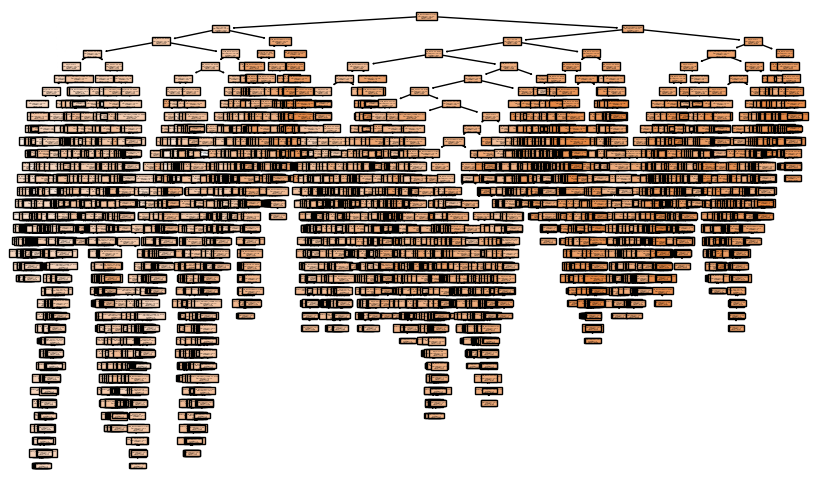

In [26]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();


Esto no hay quien lo entienda, lo que nos hace pensar que dejar los parámetros por defecto no es una buena idea. Pero entonces como lo podemos hacer? En Python tenemos el método `GridSearchCV` que nos va a permitir crear un modelo con varias combinaciones de hiperparámetros. Veamos como hacerlo: 

- `max_depth`: profundidad máxima que puede alcanzar el árbol.


- `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).


- `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).


- `max_leaf_nodes`: número máximo de nodos terminales.


- `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.


### Ajustamos el modelo usando el GridSearch

Vale pero ... ¿cómo definimos los parámetros?

-  `max depth`: núero de divisiones que hace el decission tree -- los niveles que hace  
    teóricamente que puede alcanzar un árbol de decisión es una menos que el número de muestras de entrenamiento, pero ningún algoritmo nos permitirá llegar a este punto ya que tendríamos problemas de *overfitting*. 

    También es malo tener una profundidad muy baja porque tu modelo no se ajustará lo suficiente para encontrar el mejor valor, ya que podríamos tener problemas de *underfitting*
    
    > Lo ideal, dejar que el modelo decida primero la profundidad máxima y luego, comparando las puntuaciones de *train* y de *test*, buscar si hay *overfitting* o *underfitting* y, dependiendo del grado, diminuir o aumentar la profundidad máxima.


- `max_features`: número de variables que tiene que tener en cuenta para hacer el árbol
  
  la raíz cuadrada del número de variables predictoras



In [27]:
regressor.max_depth

In [28]:
regressor.max_features

In [29]:
X.head()

,median_household_income,num_habitaciones,num_vecinos,total_habitaciones,total_baños,dist_playa,x0_AL,x0_AR,x0_AZ,x0_CA,...,x0_NV,x0_OK,x0_OR,x0_SC,x0_TN,x0_TX,x0_WA,x0_WI,x1_F,x1_M
0,0.506329,0.419162,0.694268,0.715152,1.558551,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.335443,0.329341,0.337580,0.430303,1.049203,-0.815624,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.069620,-0.119760,0.025478,0.206061,0.940957,-1.108413,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.563291,0.281437,0.267516,0.066667,-0.008266,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.379747,-0.479042,-0.261146,-0.327273,0.774454,-0.752884,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

6.0

In [32]:
regressor.tree_.max_depth # la mitad de la profundidad va a ser el límite

36

In [33]:
# max depth

print(regressor.tree_.max_depth)

36


In [34]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [35]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,4.056418e-01,3.099458e-01,5.567278e-01,0.310821,test,Decission Tree I
1,1.998901e-17,2.781430e-32,1.667762e-16,1.000000,train,Decission Tree I


In [44]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7], #[10, 12, 14]
        "min_samples_split": [10, 50, 100], # [100, 150, 200] -> número de datos
        "max_features": [1,2,3,4,5,6], # [4, 6]
        "min_samples_leaf": [100, 150, 200]
        } 

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3, # muestra el progreso - 2 pa que no te saque todo el input
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")


In [45]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [49]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_leaf=100,
                      min_samples_split=100)

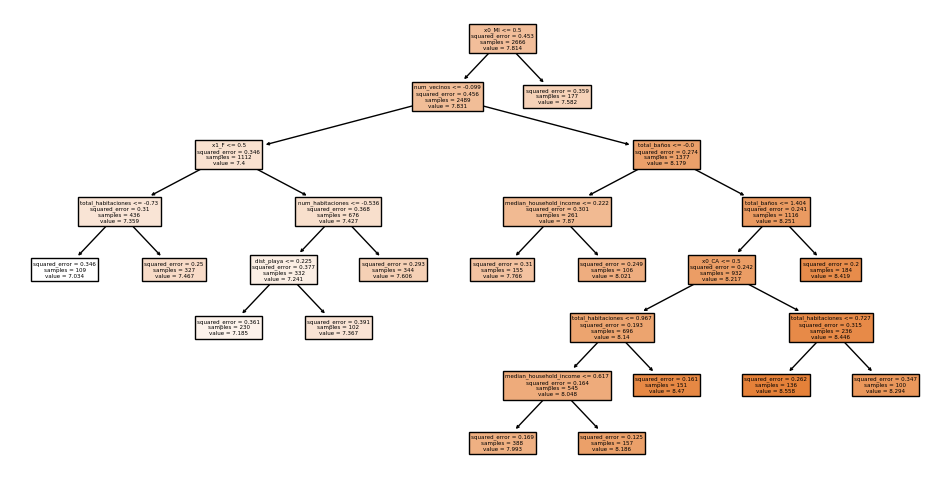

In [50]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [48]:
# guardamos la imagen 

fig.savefig("decision_tree2.png", facecolor="white")

In [51]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- x0_MI <= 0.50
|   |--- num_vecinos <= -0.10
|   |   |--- x1_F <= 0.50
|   |   |   |--- total_habitaciones <= -0.73
|   |   |   |   |--- value: [7.03]
|   |   |   |--- total_habitaciones >  -0.73
|   |   |   |   |--- value: [7.47]
|   |   |--- x1_F >  0.50
|   |   |   |--- num_habitaciones <= -0.54
|   |   |   |   |--- dist_playa <= 0.23
|   |   |   |   |   |--- value: [7.19]
|   |   |   |   |--- dist_playa >  0.23
|   |   |   |   |   |--- value: [7.37]
|   |   |   |--- num_habitaciones >  -0.54
|   |   |   |   |--- value: [7.61]
|   |--- num_vecinos >  -0.10
|   |   |--- total_baños <= -0.00
|   |   |   |--- median_household_income <= 0.22
|   |   |   |   |--- value: [7.77]
|   |   |   |--- median_household_income >  0.22
|   |   |   |   |--- value: [8.02]
|   |   |--- total_baños >  -0.00
|   |   |   |--- total_baños <= 1.40
|   |   |   |   |--- x0_CA <= 0.50
|   |   |   |   |   |--- total_habitaciones <= 0.97
|   |   |   |   |   |   |--- median_household_income <= 0.62
|   |   |

### Predicción 

In [52]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [53]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [54]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.401202,0.269380,0.519018,0.401020,test,Decision tree II
1,0.399277,0.261661,0.511528,0.422944,train,Decision tree II


**Comparemos la regresión lineal con el random Forest**

In [55]:
df_all = pd.concat([lr_results, dt_results1, dt_results2], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,3.367244e-01,2.038952e-01,4.515476e-01,0.546629,test,Regresion lineal
1,3.324057e-01,2.002353e-01,4.474766e-01,0.558409,train,Regresion lineal
0,4.056418e-01,3.099458e-01,5.567278e-01,0.310821,test,Decission Tree I
1,1.998901e-17,2.781430e-32,1.667762e-16,1.000000,train,Decission Tree I
0,4.012025e-01,2.693801e-01,5.190184e-01,0.401020,test,Decision tree II
1,3.992767e-01,2.616607e-01,5.115278e-01,0.422944,train,Decision tree II


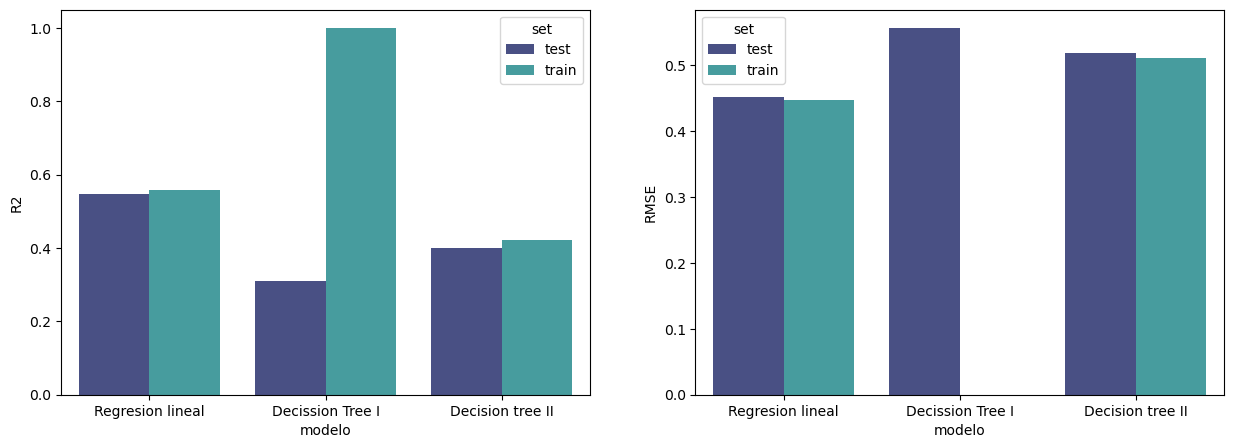

In [56]:
fig, axes = plt.subplots(1,2, figsize =(15,5))

sns.barplot(data = df_all, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = df_all, x = "modelo", y = "RMSE", hue = "set",ax = axes[1], palette = "mako");


### Importancia de cada variable

In [68]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values(by='importancia', ascending = False)


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,total_habitaciones,0.397324
9,x0_CA,0.144566
4,total_baños,0.115807
1,num_habitaciones,0.084531
2,num_vecinos,0.066723
5,dist_playa,0.050836
0,median_household_income,0.047306
11,x0_FL,0.012256
19,x0_MI,0.008283
14,x0_IL,0.007480


Tanto la variable género como la de estado estaban categorizadas y nos aparecen tantas filas como categorías teníamos. Lo que tenemos que hacer ahora es juntar cada una de esas categorías y sumar sus valores. 

In [69]:
# lo primero que hacemos es crearnos un dataframe con los valores solo de género
genero = pd.DataFrame(importancia_predictores.iloc[-2:])
genero

,predictor,importancia
34,x1_F,0.002928
35,x1_M,0.003752


In [70]:
# hacemos lo mismo para estados
estado = pd.DataFrame(importancia_predictores.loc[6:33, ])
estado.tail(2)

,predictor,importancia
32,x0_WA,0.006421
33,x0_WI,0.001236


In [71]:
# eliminamos esas filas del dataframe donde tenemos los valores de importancia

importancia_predictores.drop(genero.index, inplace = True)
importancia_predictores.drop(estado.index, inplace = True)

In [72]:
# nos creamos nuevas filas con el resultado de la suma

importancia_predictores.loc[6] =  ["estado", estado["importancia"].sum()]
importancia_predictores.loc[7] =  ["genero", genero["importancia"].sum()]

In [73]:
# ordenamos los resultados

importancia_predictores.sort_values( ascending=False, by= "importancia", inplace=True)
importancia_predictores

,predictor,importancia
3,total_habitaciones,0.397324
6,estado,0.230793
4,total_baños,0.115807
1,num_habitaciones,0.084531
2,num_vecinos,0.066723
5,dist_playa,0.050836
0,median_household_income,0.047306
7,genero,0.006680


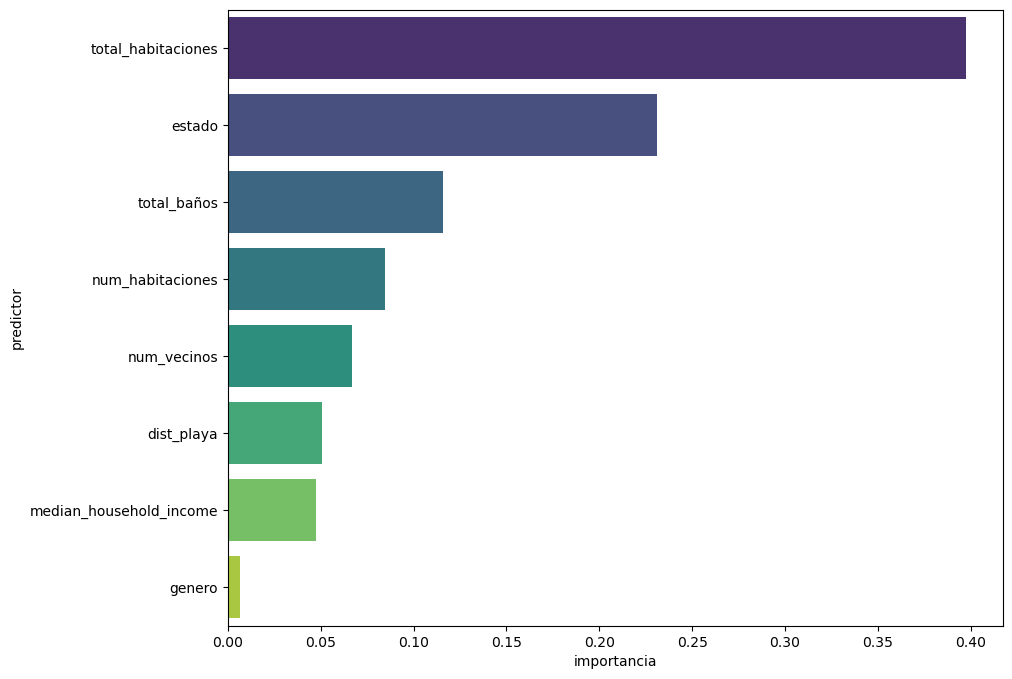

In [74]:
#y por último los ploteamos

sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");

## Random Forest

Un modelo Random Forest está formado por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping). La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo. Para conocer más sobre este tipo de modelo visitar Random Forest con Python.

![rf](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/rand_forest_clas_reg.png?raw=true)

### Ajustamos el modelo usando GridSearch 

In [48]:
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [49]:
%time
bosque.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=7, max_features=6, min_samples_split=10)

In [51]:
"""for arbol in tqdm(bos.estimators_):
    tree.plot_tree(arbol, feature_names= X_train.columns, filled = True)
    plt.show()"""

'for arbol in tqdm(bos.estimators_):\n    tree.plot_tree(arbol, feature_names= X_train.columns, filled = True)\n    plt.show()'

### Predicción

In [52]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)


In [53]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.329311,0.177365,0.421147,0.605621,test,Random Forest
1,0.312328,0.157766,0.397197,0.652070,train,Random Forest


In [54]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,3.367311e-01,2.038973e-01,4.515499e-01,0.546625,test,Regresion lineal
1,3.324067e-01,2.002354e-01,4.474766e-01,0.558409,train,Regresion lineal
0,4.056418e-01,3.099458e-01,5.567278e-01,0.310821,test,Decission Tree I
1,1.998901e-17,2.781430e-32,1.667762e-16,1.000000,train,Decission Tree I
0,3.567833e-01,2.148841e-01,4.635559e-01,0.522195,test,Decision tree II
1,3.480075e-01,2.076522e-01,4.556888e-01,0.542052,train,Decision tree II
0,3.293113e-01,1.773647e-01,4.211468e-01,0.605621,test,Random Forest
1,3.123284e-01,1.577656e-01,3.971972e-01,0.652070,train,Random Forest


In [60]:
from scipy.special import boxcox, inv_boxcox
inv_boxcox(4.165447e-01, 0.048852479880369226)

1.5103828293681822

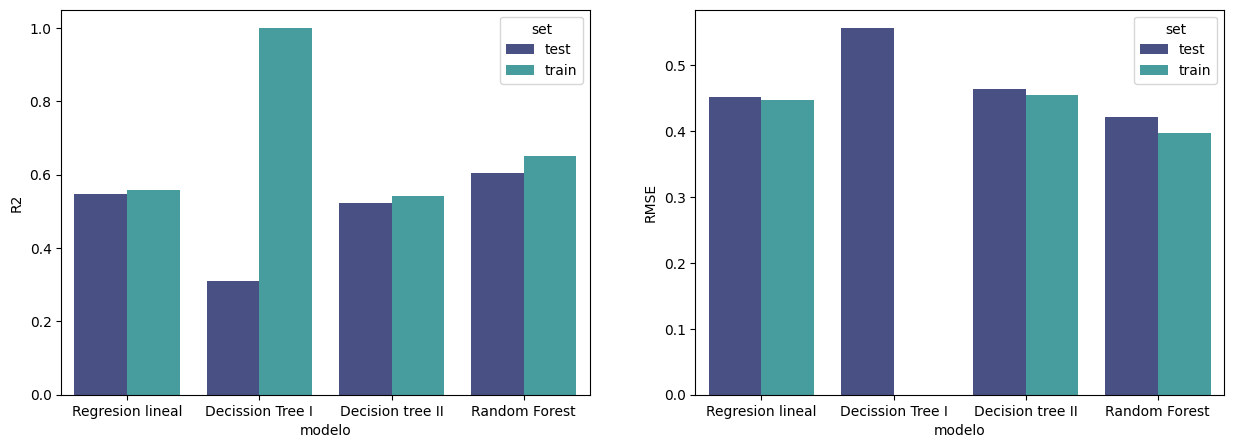

In [61]:
fig, axes = plt.subplots(1,2, figsize =(15,5))

sns.barplot(data = df_all, x = "modelo", y = "R2", hue = "set", ax = axes[0], palette="mako")
sns.barplot(data = df_all, x = "modelo", y = "RMSE", hue = "set",ax = axes[1], palette = "mako");

### Importancia de las variables

In [62]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,median_household_income,0.105406
1,num_habitaciones,0.174960
2,num_vecinos,0.209011
3,total_habitaciones,0.176591
4,total_baños,0.133827
5,dist_playa,0.014026
6,x0_AL,0.000532
7,x0_AR,0.000196
8,x0_AZ,0.001358
9,x0_CA,0.128333


In [63]:
# lo primero que hacemos es crearnos un dataframe con los valores solo de género
genero2 = pd.DataFrame(importancia_predictores_rf.iloc[-2:])
genero2

,predictor,importancia
34,x1_F,0.001764
35,x1_M,0.001344


In [64]:
# hacemos lo mismo para estados
estado2 = pd.DataFrame(importancia_predictores_rf.loc[6:33, ])
estado2.head(2)

,predictor,importancia
6,x0_AL,0.000532
7,x0_AR,0.000196


In [65]:
# eliminamos esas filas del dataframe donde tenemos los valores de importancia

importancia_predictores_rf.drop(genero.index, inplace = True)
importancia_predictores_rf.drop(estado.index, inplace = True)

In [66]:
# nos creamos nuevas filas con el resultado de la suma

importancia_predictores_rf.loc[6] =  ["estado", estado["importancia"].sum()]
importancia_predictores_rf.loc[7] =  ["genero", genero["importancia"].sum()]

In [67]:
# ordenamos los resultados

importancia_predictores_rf.sort_values( ascending=False, by= "importancia", inplace=True)
importancia_predictores_rf

,predictor,importancia
6,estado,0.230793
2,num_vecinos,0.209011
3,total_habitaciones,0.176591
1,num_habitaciones,0.174960
4,total_baños,0.133827
0,median_household_income,0.105406
5,dist_playa,0.014026
7,genero,0.006680


In [68]:
importancia_predictores_rf

,predictor,importancia
6,estado,0.230793
2,num_vecinos,0.209011
3,total_habitaciones,0.176591
1,num_habitaciones,0.174960
4,total_baños,0.133827
0,median_household_income,0.105406
5,dist_playa,0.014026
7,genero,0.006680


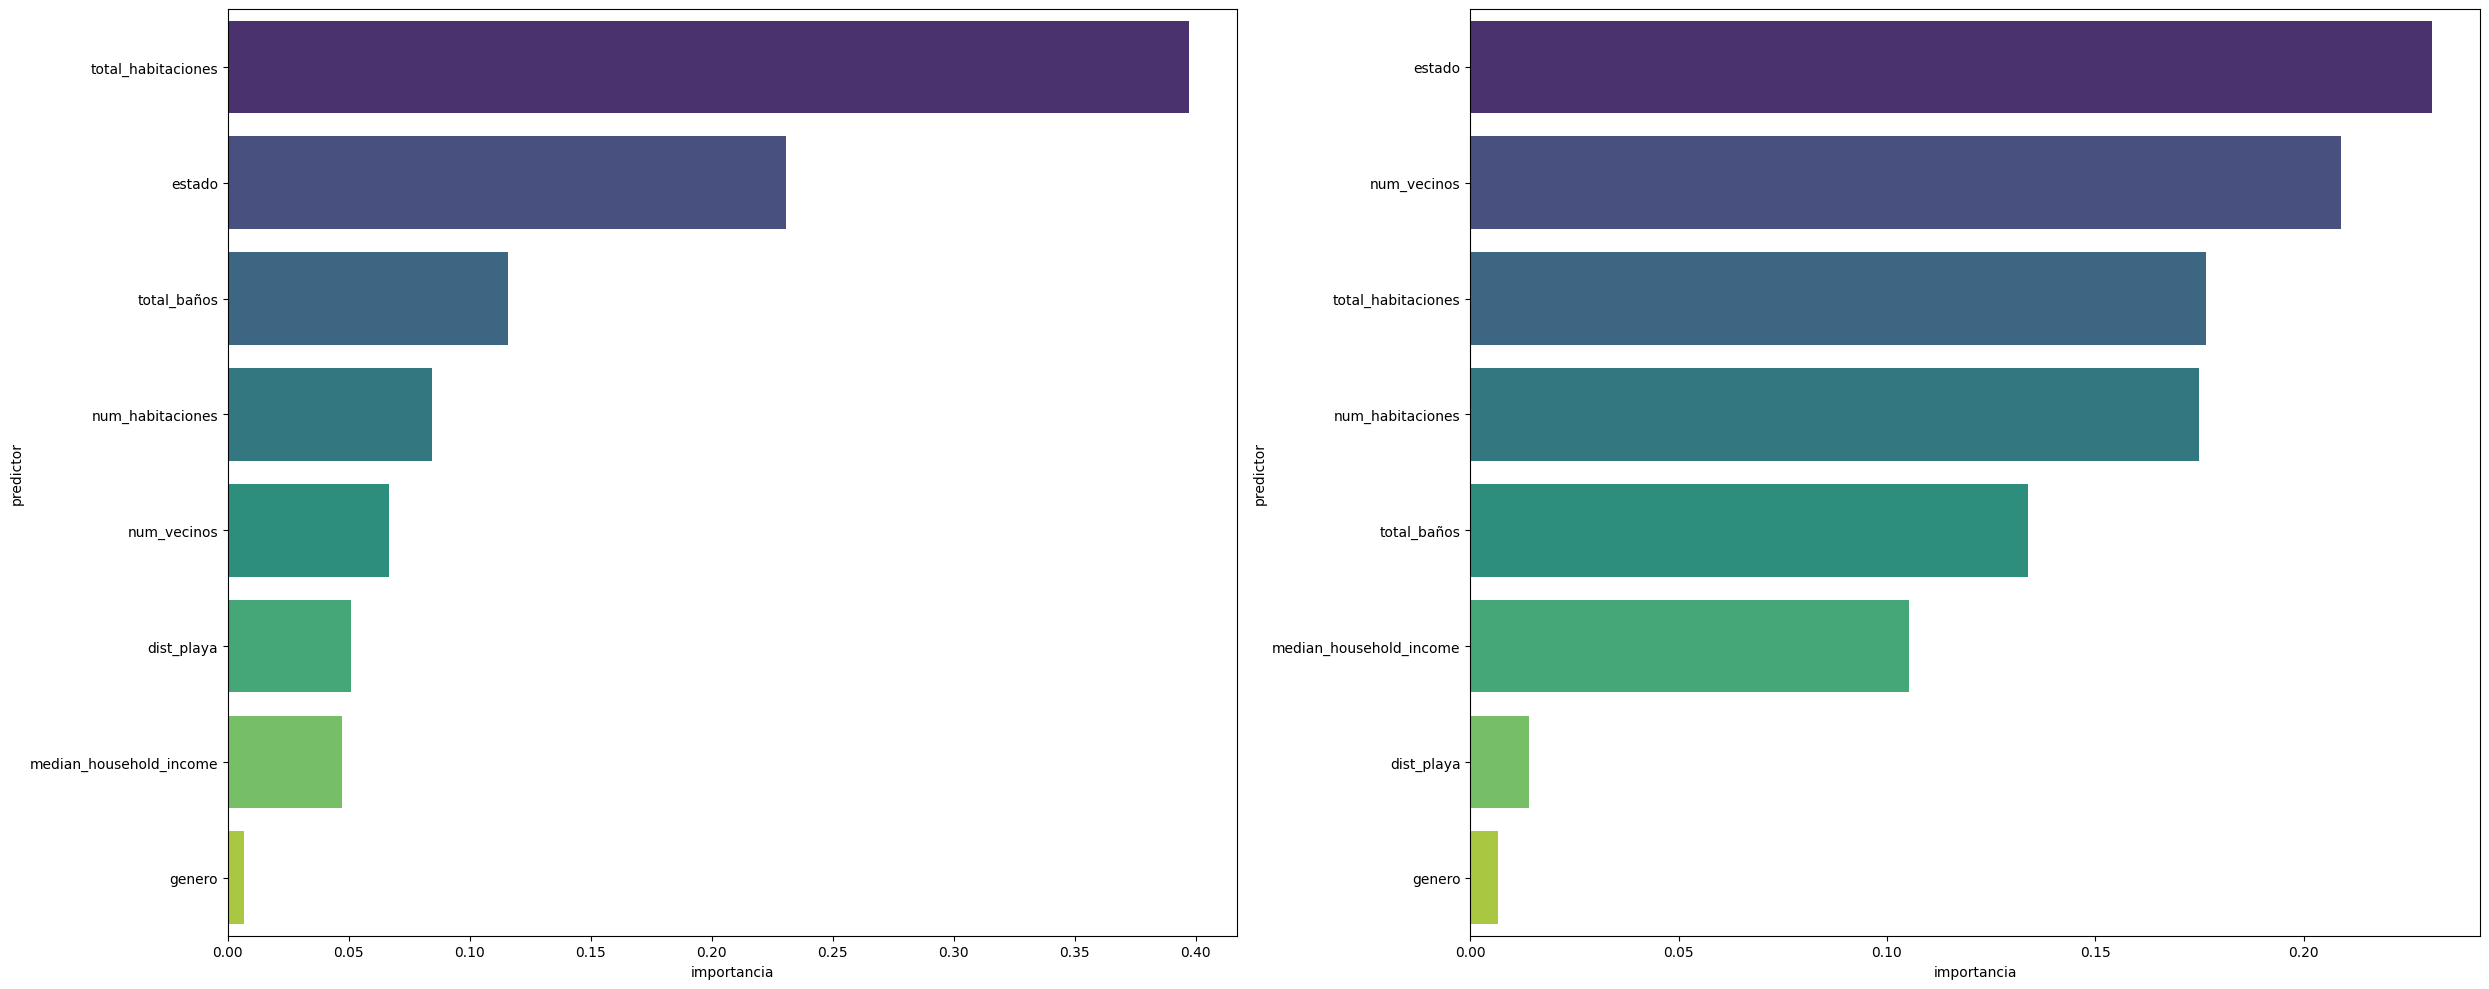

In [70]:
#y por último los ploteamos
fig, axes = plt.subplots(1,2, figsize =(25,10))

sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, ax = axes[0], palette="viridis");
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf, ax = axes[1], palette="viridis")
fig.tight_layout();